In [104]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
df = pd.read_csv("forestfires.csv") 

Text(0.5, 1.0, 'MSE of test data at each depth')

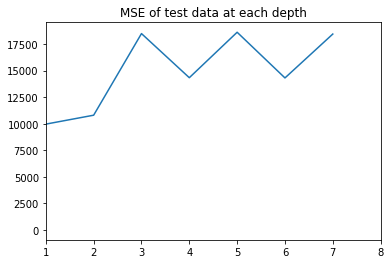

In [157]:
from sklearn import metrics
df.head()
X = df[df.columns[0:12]]
X = X._get_numeric_data()
y = df[df.columns[12:13]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

mseList = [0]
for i in range (1,8):
    dtReg = DecisionTreeRegressor(max_depth=i)
    dtReg.fit(X_train, y_train)
    y_pred = dtReg.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    mseList.append(mse)


plt.plot(mseList)
plt.xlim([1, 8])
plt.title("MSE of test data at each depth")

mse =  9958.211919867912
X[6] = Temp


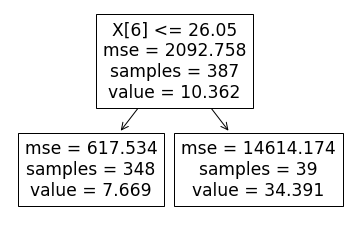

In [122]:
dtReg = DecisionTreeRegressor(max_depth=1)
dtReg.fit(X_train, y_train)
y_pred = dtReg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
tree.plot_tree(dtReg)
print("mse = ", mse)
print("X[6] = Temp")